In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path='Fruits_Vegetables/train/'
data_test_path='Fruits_Vegetables/test/'
data_validation_path='Fruits_Vegetables/validation/'

In [3]:
img_width=180
img_hight=180

In [4]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_hight),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_categorys=data_train.class_names

In [6]:
data_categorys

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    image_size=(img_width,img_hight),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [8]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width,img_hight),
    batch_size=32,
    shuffle=True,
    validation_split=False
)

Found 359 files belonging to 36 classes.


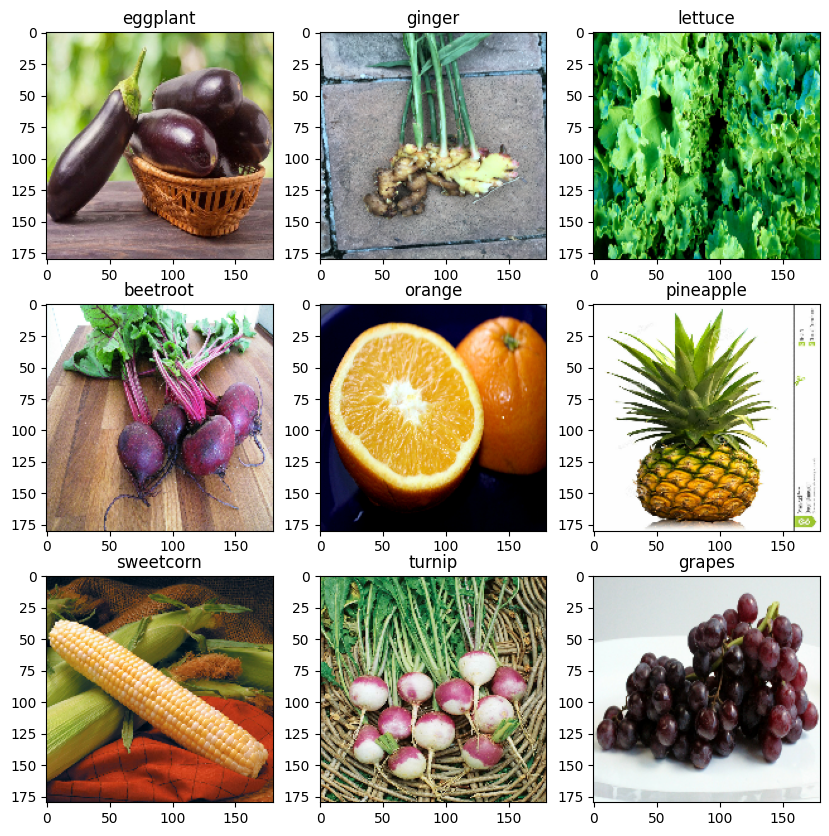

In [9]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_categorys[labels[i]])

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_categorys))
])

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 388ms/step - accuracy: 0.0964 - loss: 3.4270 - val_accuracy: 0.3960 - val_loss: 2.1541
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 387ms/step - accuracy: 0.3543 - loss: 2.2749 - val_accuracy: 0.6296 - val_loss: 1.2819
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 384ms/step - accuracy: 0.5185 - loss: 1.7149 - val_accuracy: 0.7464 - val_loss: 0.8808
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 373ms/step - accuracy: 0.6433 - loss: 1.2326 - val_accuracy: 0.8718 - val_loss: 0.5563
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - accuracy: 0.7929 - loss: 0.6667 - val_accuracy: 0.9202 - val_loss: 0.4183
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1448s 15s/step - accuracy: 0.8958 - loss: 0.3900 - val_accuracy: 0.9487 - val_loss: 0.4162
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.9482 - loss: 0.2338 - val_accuracy: 0.9402 - val_loss: 0.4637
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.9549 - loss: 0.1979 - val_accu

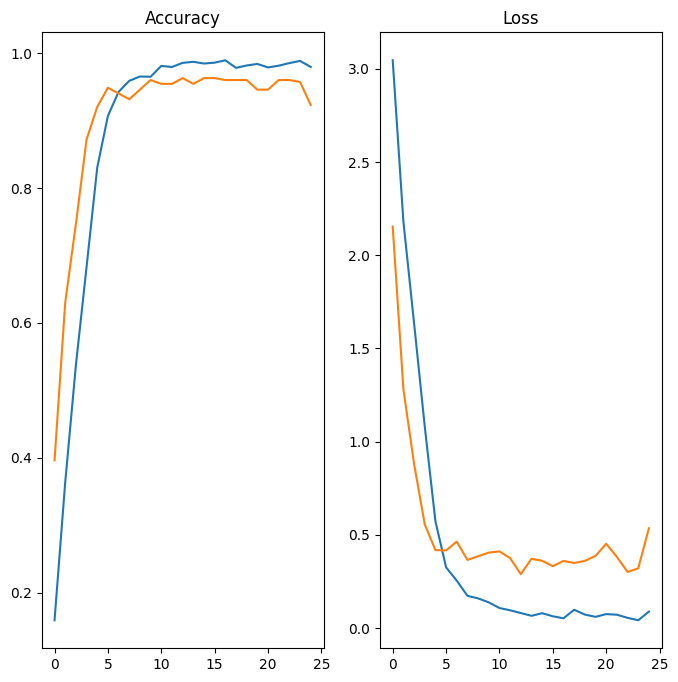

In [14]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='validation Accuracy')
plt.title('Accuracy');

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='validation Accuracy')
plt.title('Loss');

In [15]:
image='corn.jpg'

In [16]:
image=tf.keras.utils.load_img(image,target_size=(img_hight,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [17]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [18]:
score=tf.nn.softmax(predict)

In [19]:
print('Veg/Fruit in image is{} with accuracy of {:0.2f}'.format(data_categorys[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image iscorn with accuracy of 96.78


In [20]:
model.save('Image_classify.keras')